In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

100% 1.24G/1.25G [00:12<00:00, 80.0MB/s]
100% 1.25G/1.25G [00:12<00:00, 107MB/s] 


In [7]:
! unzip plant-disease-recognition-dataset.zip

Archive:  plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/Healthy/8e8

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [9]:
train_directory='/content/Train/Train'
categories=[category for category in os.listdir(train_directory)]
categories

['Powdery', 'Rust', 'Healthy']

In [10]:
valid_directory='/content/Validation/Validation'
test_directory='/content/Test/Test'

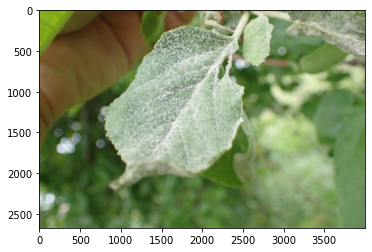

In [16]:
# def create_category():
for category in categories:
  path=os.path.join(train_directory,category)
  class_label=categories.index(category)
  for image in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,image))
    cvt=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(cvt)
    break
  break



In [17]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join(train_directory,category)
    for image in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,image))
        cvt=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        new_img=cv2.resize(cvt,(100,100))
        new_array=training_data.append([new_img,class_label])
      except:
        pass
create_training_data()

In [18]:
validation_data=[]
def create_validation():
  for category in categories:
    path=os.path.join(valid_directory,category)
    class_label=categories.index(category)
    for image in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,image))
        cvt=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        new_img=cv2.resize(cvt,(100,100))
        new_array=validation_data.append([new_img,class_label])
      except:
        pass
create_validation()

In [19]:
for sample in training_data[3]:
  print(sample)


[[[161 175 162]
  [173 180 173]
  [186 190 189]
  ...
  [127 153 126]
  [126 157 133]
  [134 159 137]]

 [[142 162 135]
  [156 174 161]
  [166 181 171]
  ...
  [119 144 112]
  [136 164 141]
  [137 162 140]]

 [[126 147 116]
  [144 163 141]
  [149 165 148]
  ...
  [114 141 108]
  [130 155 132]
  [125 155 130]]

 ...

 [[175 196 157]
  [173 194 155]
  [171 192 153]
  ...
  [146 175 117]
  [153 182 124]
  [153 183 133]]

 [[169 195 150]
  [169 192 148]
  [169 192 150]
  ...
  [158 180 131]
  [154 181 130]
  [158 186 138]]

 [[173 196 154]
  [161 187 142]
  [168 191 145]
  ...
  [153 175 128]
  [154 183 133]
  [147 174 129]]]
0


In [20]:
x_train=[]
y_train=[]
for features,labels in training_data:
  x_train.append(features)
  y_train.append(labels)


In [21]:
y_valid=[]
x_valid=[]
for features,labels in validation_data:
  x_valid.append(features)
  y_valid.append(labels)


In [22]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
y_train.shape

(1322, 100, 100, 3)


(1322,)

In [23]:
x_valid=np.array(x_valid)
y_valid=np.array(y_valid)
print(x_valid.shape)
print(y_valid.shape)

(60, 100, 100, 3)
(60,)


In [24]:
x_train,x_valid=x_train/255,x_valid/255

In [11]:
train_data_gen=ImageDataGenerator(zoom_range=1,vertical_flip=True,width_shift_range=0.2,height_shift_range=0.2,
                                  fill_mode='nearest',shear_range=0.2,rescale=1./255)
valid_data_gen=ImageDataGenerator(zoom_range=1,vertical_flip=True,width_shift_range=0.3,height_shift_range=0.1,
                                  fill_mode='nearest',shear_range=0.4,rescale=1./255)
train_data=train_data_gen.flow_from_directory(directory=train_directory,target_size=(100,100),batch_size=50)
valid_data=valid_data_gen.flow_from_directory(directory=valid_directory,target_size=(100,100),batch_size=50)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [12]:
# making the model
model=models.Sequential([
                         layers.Conv2D(64,(3,3),input_shape=(100,100,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Flatten(),
                         layers.Dense(500,activation='relu'),
                         layers.Dense(3,activation='softmax')
]
)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               3200500   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [15]:
# model fitting with image augmentation
hist=model.fit(train_data,validation_data=valid_data,epochs=10)

Epoch 1/10
27/27 [==============================] - 223s 8s/step - loss: 1.1196 - accuracy: 0.3926 - val_loss: 0.9382 - val_accuracy: 0.4833
Epoch 2/10
27/27 [==============================] - 214s 8s/step - loss: 0.8446 - accuracy: 0.6029 - val_loss: 0.9669 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - 216s 8s/step - loss: 0.7390 - accuracy: 0.6528 - val_loss: 0.9330 - val_accuracy: 0.5167
Epoch 4/10
27/27 [==============================] - 215s 8s/step - loss: 0.6549 - accuracy: 0.7194 - val_loss: 0.8037 - val_accuracy: 0.6667
Epoch 5/10
27/27 [==============================] - 214s 8s/step - loss: 0.6164 - accuracy: 0.7436 - val_loss: 0.7427 - val_accuracy: 0.7000
Epoch 6/10
27/27 [==============================] - 216s 8s/step - loss: 0.5747 - accuracy: 0.7769 - val_loss: 0.7038 - val_accuracy: 0.7167
Epoch 7/10
27/27 [==============================] - 213s 8s/step - loss: 0.5443 - accuracy: 0.7920 - val_loss: 0.6309 - val_accuracy: 0.7500
Epoch 8/10
27

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Center right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


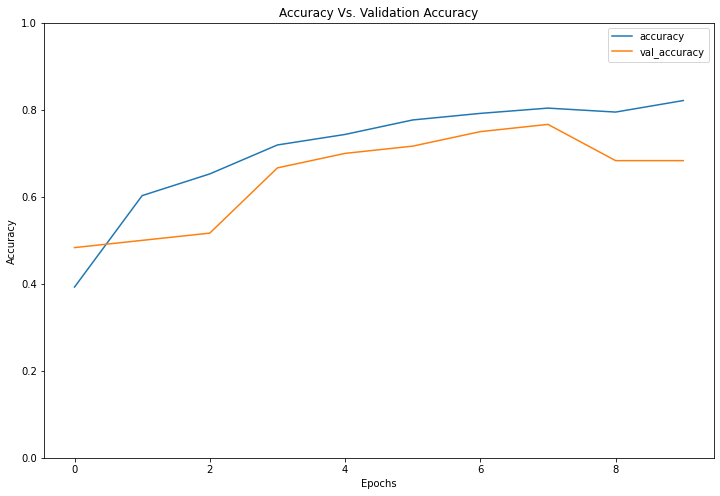

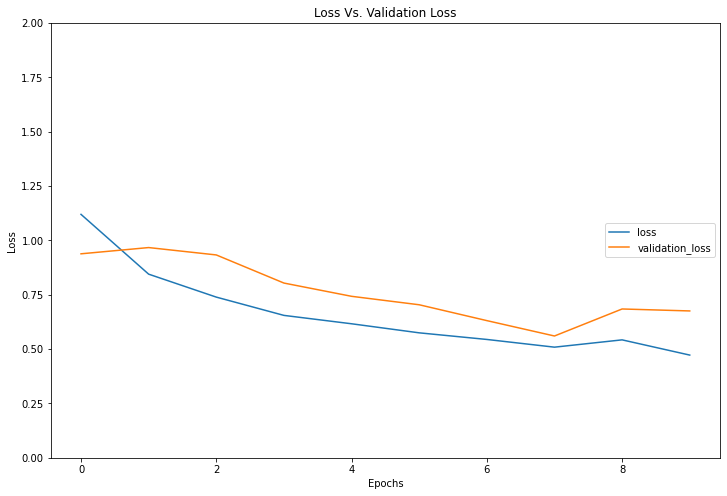

In [35]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='Center right')
plt.title('Accuracy Vs. Validation Accuracy')
plt.ylim(0,1)
plt.show()
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='center right')
plt.title('Loss Vs. Validation Loss')
plt.ylim(0,2)
plt.show()

In [26]:
k# making the model
model1=models.Sequential([
                         layers.Conv2D(64,(3,3),input_shape=(100,100,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Flatten(),
                         layers.Dense(500,activation='relu'),
                         layers.Dense(3,activation='softmax')
]
)
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
# model fitting without image augmentation
hist1=model1.fit(x=x_train,y=y_train,validation_data=(x_valid,y_valid),epochs=5)

Epoch 1/5
42/42 [==============================] - 19s 438ms/step - loss: 0.0317 - accuracy: 0.9758 - val_loss: 44.4360 - val_accuracy: 0.3333
Epoch 2/5
42/42 [==============================] - 18s 433ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 45.7656 - val_accuracy: 0.3333
Epoch 3/5
42/42 [==============================] - 18s 435ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 45.7875 - val_accuracy: 0.3333
Epoch 4/5
42/42 [==============================] - 18s 433ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 45.7877 - val_accuracy: 0.3333
Epoch 5/5
42/42 [==============================] - 18s 434ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 45.7877 - val_accuracy: 0.3333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Center right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


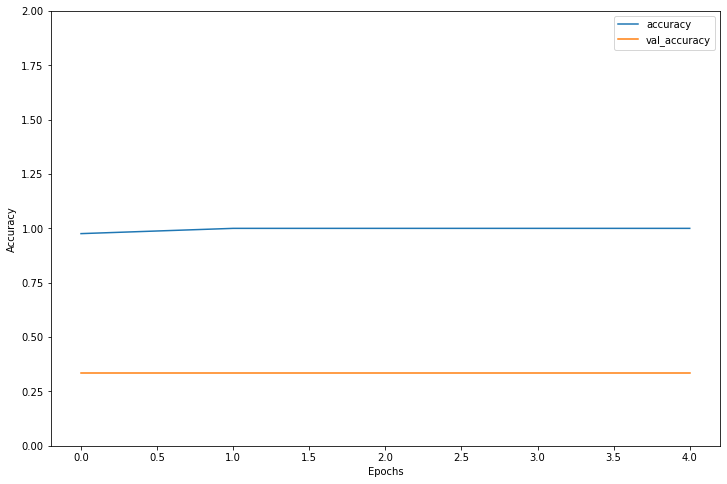

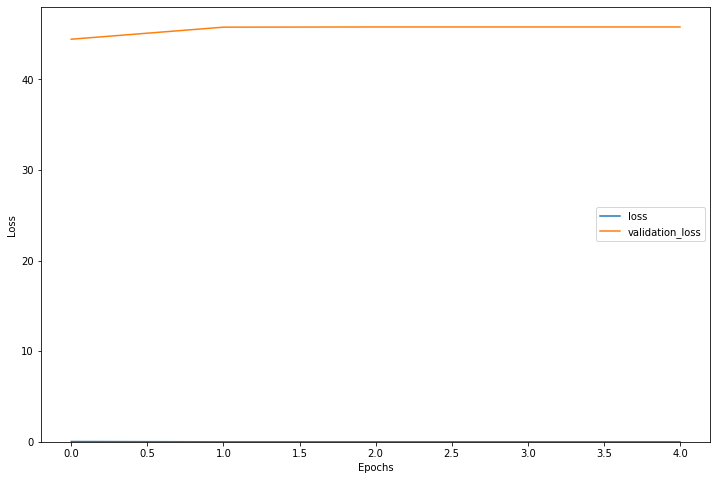

In [38]:
plt.figure(figsize=(12,8))
plt.plot(hist1.history['accuracy'],label='accuracy')
plt.plot(hist1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='Center right')
plt.ylim(0,2)
plt.show()
plt.figure(figsize=(12,8))
plt.plot(hist1.history['loss'],label='loss')
plt.plot(hist1.history['val_loss'],label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='center right')
plt.ylim(0,48)
plt.show()